<a href="https://colab.research.google.com/github/Am1rTl/Info/blob/main/%22%D0%94%D0%97_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Введение

## Характеристики набора данных

В наборе данных представлены следующие характерисьтики зданий, влияющие на энергоэффективность.

Характеристика | Описание
--- | :---
X1 | Оьносительная компактность
X2 | Площадь пола
X3 | Площадь стен
X4 | Площадь крыши
X5 | Средняя высота
X6 | Ориентация
X7 | Площадь остекления
X8 | Распределение площадей остекления
Y1 | Эффективность отопления
Y2 | Эффективность охладения

## 2) Задание

Построить модель регресси для предсказания нагрузки отопления и нагрузки охладдения.

# 3) Загрузка набора данных

1. Загрузить набор данных ENB2012_data.xlsx в сесионное хранилище.
1. Создать DataFrame Pandas. Имена столбцов взять из первой строки файла.

In [ ]:
#Импортировать необходимые библиотеки
import pandas as pd

In [ ]:
#Загрузить набор данных и создать объект DataFrame
data = pd.read_excel("ENB2012_data.xlsx")

In [ ]:
#Вывести первые 5 строк DataFrame
print(data.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


# 4) Изучение набора данных

## 4.1) Определение типов данных столбцов

In [ ]:
#Вывести информацию о DataFrame, позволяющие определить типы столбцов.
print(data.dtypes)

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


## 4.1) Проверка наличия отсутствующих значений

In [ ]:
#Вывести информацию о DataFrame, позволяющие определить наличие отсутствующих значений.
missing_values = data.isnull().sum()
print(missing_values)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


## 4.2) Заполнение отсутствующих значений или удаление строк с отсутсвующими значениями

Пункт выполняется если в наборе данныъ есть отсутствующие значения

In [ ]:
#Заполнить пропуске в наборе данных, при их наличии.
data_filled = data.fillna(data.mean())

print(data_filled.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


## 5) Изучение статистических показателей набора данных

In [ ]:
#Рассчитать и вывести статистические характеристики набора данных.
print(data.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

#Выводы по разделам 4 и 5

# 6) Исследовательский анализ данных

## 6.1) Анализ корреляционной матрицы

In [ ]:
#Рассчитать и вывести корреляционную матрицу для исследуемого набора данных.
correlation_matrix = data.corr()

print(correlation_matrix)

<Axes: >

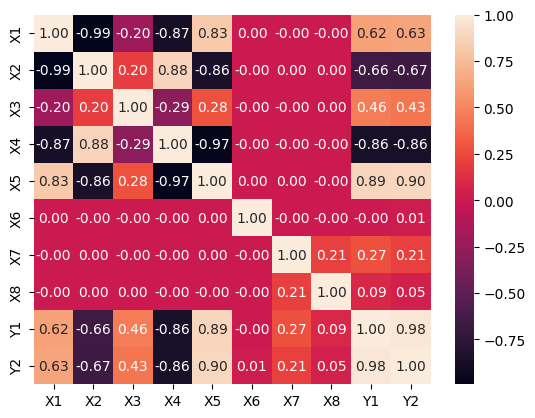

In [29]:
#Визуализация корреляционной матрици
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")

#Выводы по разделу 6

## 7) Визуализация данных

Выбрать **существенные** признаки.

Под **существенным** будем понимать признак, коэффициент корреляции которого с целевым признаком превышает по абсолютной величине 0.6. Если таких признаков нет, считать существенными все признаки.

Построить зависимости каждого из целевых признаков от 4-х "существенных", имеющих наибольший по модулю коэффициент корреляции.

In [28]:
#Импортировать библиотеку seaborn
import seaborn as sns

In [ ]:
#Первая зависимость

In [ ]:
#Вторая зависимость


In [ ]:
#Третья зависимость

In [ ]:
#Четвёртая зависимость

In [ ]:
#Пятая зависимость

In [ ]:
#Шестая зависимость

In [ ]:
#Седьмая зависимость

In [ ]:
#Восьмая зависимость

#Выводы по разделу 7

# 8) Подготова данных для обучения

Сформировать набор данных, состоящий из существенных признаков. Целевые признаки в набор данных не включаются.

Сформировать наборы данных, состоящие из целевых признаков.


In [ ]:
#Ваш код для формирования указанных наборов данных

## 8.1) Выполнить нормализацию данных для набора существенных признаков.

In [ ]:
#Импортировать библиотеку preprocessing
#Выполнить нормализацию данных

In [ ]:
#Вывести первые 5 строк нормализованного набора данных

## 8.2) Разделение набора данных

Разделить нормализованный набор данных и набор данных, содержащий целевой признак, на обучающую и тестовую выборки

In [ ]:
#Импортировать библиотеку train_test_split
#Выполнить разделение нормализованного набора данных на обучающую и тестовую выборки

# 9) Обучение модели

Обучить модель линейной регрессии.

In [ ]:
#Импортировать библиотеку LinearRegression
#Выполить обучение модели для каждого из двух целевых признаков

## 10) Оценка качества модели

Вычислить прогнозные значения для тестового набора данных

In [ ]:
#Ваш код для вычисления прогнозных значений

Вычислить оценкbи:


* mean squre error
* $R^2$  
*   explained variance



In [ ]:
#Импортировать библиотеку metrics
#Вычислить указанные оценки

#Выводлы по разделу 10